# Libraries Import

In [46]:
!pip install --upgrade pip

In [47]:
!pip install SoundFile
!pip install librosa


In [48]:
!apt-get update

Get:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [1229 B]
Get:2 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1581 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease                
Ign:5 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Err:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease            
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY C0BA5CE6DC6315A3
Get:6 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease [6396 B] 
Hit:7 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease              
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Err:2 http://developer.

In [49]:
!apt-get install -y libsndfile-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libsndfile1-dev' instead of 'libsndfile-dev'
libsndfile1-dev is already the newest version (1.0.28-4ubuntu0.18.04.2).
0 upgraded, 0 newly installed, 0 to remove and 237 not upgraded.


In [50]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import tensorflow.keras.layers as L
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


# Data Import

In [51]:
ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [52]:
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Tess_directory_list = os.listdir(Tess)
print(Tess_directory_list)

['YAF_fear', 'OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_neutral', 'YAF_angry', 'OAF_Sad', 'YAF_disgust', 'YAF_neutral', 'OAF_Pleasant_surprise', 'YAF_happy', 'OAF_happy', 'YAF_sad', 'YAF_pleasant_surprised']


In [53]:
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
Savee_directory_list = os.listdir(Savee)
# print(Savee_directory_list)

In [54]:
Crema = "/kaggle/input/cremad/AudioWAV/"
Crema_directory_list = os.listdir(Crema)
# print(Crema_directory_list)

Ravdess Dataset

In [55]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
#     print(actor)
    for f in actor:
        part = f.split('.')[0].split('-')
#         print(part)
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[3]))
#         print(file_emotion)
        file_path.append(ravdess + i + '/' + f)

In [56]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-06-02-01-01-07.wav
03
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav
5
03-01-05-02-01-02-07.wav


In [57]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
3  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
4  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
     Emotions                                               Path
1435  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1436  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1437  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1439  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
neutral    1440
Name: Emotions, dtype: int64


Crema Dataset

In [58]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

sad        1271
happy      1271
angry      1271
disgust    1271
fear       1271
neutral    1087
Name: Emotions, dtype: int64


Tess Dataset

In [59]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

sad         400
happy       400
fear        400
angry       400
disgust     400
surprise    400
neutral     400
Name: Emotions, dtype: int64


SAVEE Dataset

In [60]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral     120
surprise     60
sad          60
disgust      60
angry        60
fear         60
happy        60
Name: Emotions, dtype: int64


In [61]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
3,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [62]:
len(data_path)

12162

In [63]:
print(data_path.Emotions.value_counts())

neutral     3047
angry       1731
fear        1731
sad         1731
happy       1731
disgust     1731
surprise     460
Name: Emotions, dtype: int64


In [64]:
data,sr = librosa.load(file_path[0])
sr

22050

In [65]:
ipd.Audio(data,rate=sr)

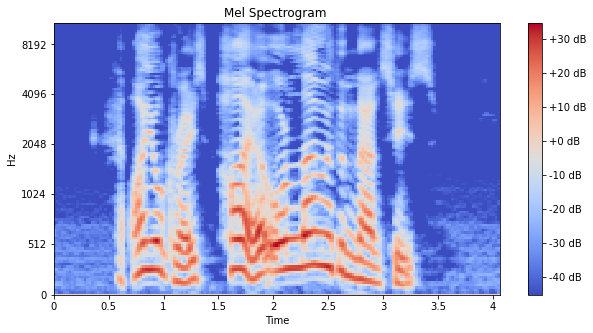

In [66]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

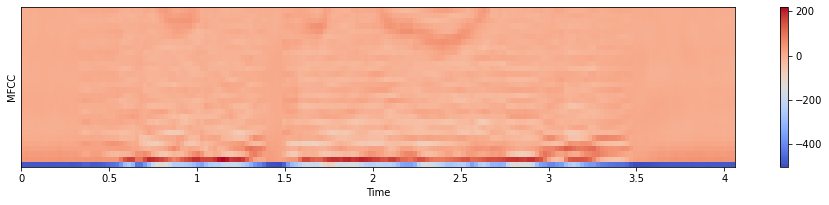

In [67]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [68]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

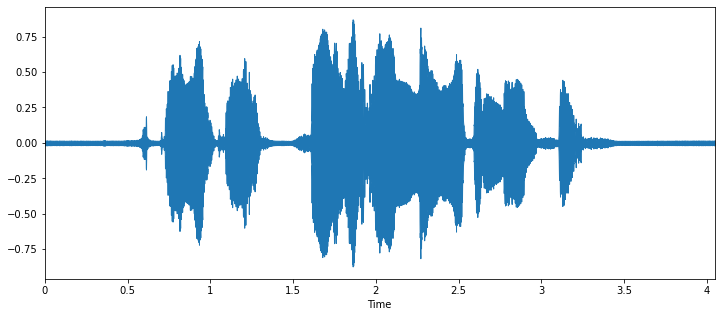

In [69]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=data, sr=sr)
ipd.Audio(data,rate=sr)

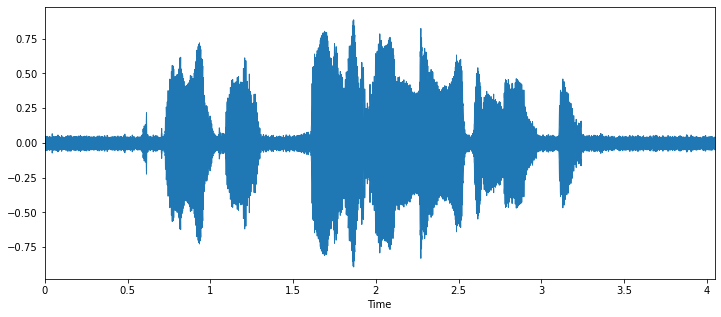

In [70]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sr)
ipd.Audio(x, rate=sr)

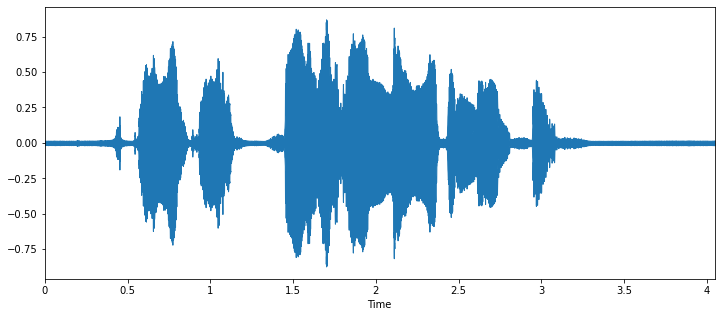

In [71]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [72]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
#     noised_audio=noise(data)
#     aud2=extract_features(noised_audio)
#     audio=np.vstack((audio,aud2))
    
#     pitched_audio=pitch(data,sr)
#     aud3=extract_features(pitched_audio)
#     audio=np.vstack((audio,aud3))
    
#     pitched_audio1=pitch(data,sr)
#     pitched_noised_audio=noise(pitched_audio1)
#     aud4=extract_features(pitched_noised_audio)
#     audio=np.vstack((audio,aud4))
    
    return audio

In [73]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [74]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder to convert emotion names to numerical labels
label_encoder = LabelEncoder()
data_path['Encoded_Emotion'] = label_encoder.fit_transform(data_path.Emotions)

In [75]:
print(data_path.Encoded_Emotion.value_counts())

4    3047
5    1731
3    1731
2    1731
1    1731
0    1731
6     460
Name: Encoded_Emotion, dtype: int64


In [76]:
import timeit
from collections import defaultdict
from tqdm import tqdm

start = timeit.default_timer()
X,Y=[],[]
data_path = data_path.sample(frac=1).reset_index(drop=True)
for label in data_path['Encoded_Emotion'].unique():
    # Filter DataFrame for files with current label
    label_files = data_path[data_path['Encoded_Emotion'] == label]
    label_files.reset_index(drop=True, inplace=True)
    # Read fixed amount of data from each class
    for index, row in label_files.iterrows():
        path=row['Path']
        emotion= row['Encoded_Emotion']
        features=get_features(path)
        
#         for i in features:
        X.append(features)
        Y.append(emotion)
        
        if index%100==0:
            print(index)
            
        if index>2000:
            print("Data loaded")
            break

print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
Data loaded
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
0
100
200
300
400
Done
Time:  640.4864720649998


# Get Features

In [77]:
len(X), len(Y), data_path.Path.shape

(11117, 11117, (12162,))

In [78]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6])

# Saving features

In [79]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.013184,0.020996,0.023926,0.025879,0.023438,0.022461,0.024414,0.025391,0.037109,0.069824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.019531,0.029297,0.036133,0.035645,0.041504,0.041992,0.047852,0.054688,0.049316,0.048340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.017090,0.026855,0.063965,0.130371,0.221191,0.287598,0.318848,0.270508,0.184570,0.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.017090,0.033691,0.074219,0.096191,0.103027,0.107910,0.079102,0.054688,0.049316,0.037598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.012207,0.018555,0.040527,0.062012,0.062012,0.062012,0.046387,0.024414,0.024902,0.023926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [80]:
Emotions.shape

(11117, 2377)

In [81]:
print(Emotions.isna().any())
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape
np.sum(Emotions.isna())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool
0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [82]:
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.013184,0.020996,0.023926,0.025879,0.023438,0.022461,0.024414,0.025391,0.037109,0.069824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.019531,0.029297,0.036133,0.035645,0.041504,0.041992,0.047852,0.054688,0.049316,0.048340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.017090,0.026855,0.063965,0.130371,0.221191,0.287598,0.318848,0.270508,0.184570,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.017090,0.033691,0.074219,0.096191,0.103027,0.107910,0.079102,0.054688,0.049316,0.037598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.012207,0.018555,0.040527,0.062012,0.062012,0.062012,0.046387,0.024414,0.024902,0.023926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [83]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

print(Y.shape)
X.shape

(11117, 7)


(11117, 2376)

In [84]:
#split data to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8893, 2376), (8893, 7), (2224, 2376), (2224, 7))

In [85]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [86]:




# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8893, 2376), (8893, 7), (2224, 2376), (2224, 7))

In [87]:
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

# early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
# lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [88]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((8893, 2376, 1), (8893, 7), (2224, 2376, 1), (2224, 7))

In [128]:
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense, Bidirectional
from tensorflow.keras import Sequential

model = Sequential()

model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 2376, 512)         528384    
_________________________________________________________________
dropout_30 (Dropout)         (None, 2376, 512)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2376, 256)         656384    
_________________________________________________________________
dropout_31 (Dropout)         (None, 2376, 256)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)              

In [129]:
history=model.fit(x_traincnn, y_train, epochs=20, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[model_checkpoint])

Train on 8893 samples, validate on 2224 samples
Epoch 1/20
8893/8893 [==============================] - 126s 14ms/sample - loss: 1.7232 - accuracy: 0.2994 - val_loss: 1.6545 - val_accuracy: 0.3332
Epoch 2/20
8893/8893 [==============================] - 120s 13ms/sample - loss: 1.6512 - accuracy: 0.3385 - val_loss: 1.6416 - val_accuracy: 0.3404
Epoch 3/20
8893/8893 [==============================] - 119s 13ms/sample - loss: 1.6167 - accuracy: 0.3538 - val_loss: 1.5973 - val_accuracy: 0.3696
Epoch 4/20
8893/8893 [==============================] - 119s 13ms/sample - loss: 1.5815 - accuracy: 0.3700 - val_loss: 1.5721 - val_accuracy: 0.3835
Epoch 5/20
8893/8893 [==============================] - 119s 13ms/sample - loss: 1.5539 - accuracy: 0.3850 - val_loss: 1.4958 - val_accuracy: 0.4213
Epoch 6/20
8893/8893 [==============================] - 119s 13ms/sample - loss: 1.5088 - accuracy: 0.4074 - val_loss: 1.4724 - val_accuracy: 0.4213
Epoch 7/20
8893/8893 [==============================] - 12

In [130]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

# epochs = [i for i in range(10)]
# fig , ax = plt.subplots(1,2)
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# test_acc = history.history['val_accuracy']
# test_loss = history.history['val_loss']

# fig.set_size_inches(20,6)
# ax[0].plot(epochs , train_loss , label = 'Training Loss')
# ax[0].plot(epochs , test_loss , label = 'Testing Loss')
# ax[0].set_title('Training & Testing Loss')
# ax[0].legend()
# ax[0].set_xlabel("Epochs")

# ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
# ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
# ax[1].set_title('Training & Testing Accuracy')
# ax[1].legend()
# ax[1].set_xlabel("Epochs")
# plt.show()

2224/2224 [==============================] - 14s 6ms/sample - loss: 1.2607 - accuracy: 0.5166
Accuracy of our model on test data :  51.66366696357727 %


In [131]:
model_save_path = '/kaggle/working/speech_bilstm_cnn_model.h5'
model.save(model_save_path)
print("Model saved successfully at:", model_save_path)

Model saved successfully at: /kaggle/working/speech_bilstm_cnn_model.h5


In [132]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

,Predicted Labels,Actual Labels
0,5,2
1,0,2
2,0,0
3,3,3
4,3,3
5,2,2
6,5,5
7,2,0
8,5,5
9,5,5


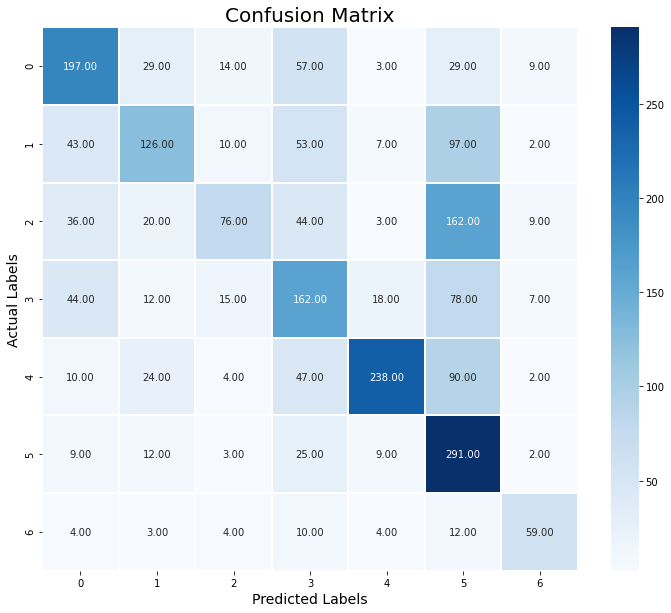

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       338
           1       0.56      0.37      0.45       338
           2       0.60      0.22      0.32       350
           3       0.41      0.48      0.44       336
           4       0.84      0.57      0.68       415
           5       0.38      0.83      0.52       351
           6       0.66      0.61      0.63        96

    accuracy                           0.52      2224
   macro avg       0.58      0.52      0.52      2224
weighted avg       0.57      0.52      0.51      2224



In [133]:
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))